# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

import seaborn as sns

import json

from sklearn.feature_selection import mutual_info_classif

from collections import defaultdict

from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
path_to_save = './../results/03d_features_analysis'

# Loading data

In [4]:
path_to_ftir_data_3800_2500 = './../data/processed_data/dataset_3800_2500_engineered.csv'
path_to_ftir_data_1900_800 = './../data/processed_data/dataset_1900_800_engineered.csv'

path_to_features_description_3800_2500 = './../data/processed_data/features_description_3800_2500.json'
path_to_features_description_1900_800 = './../data/processed_data/features_description_1900_800.json'

## FTIR-features (*long-list*)

In [5]:
dataset_3800_2500 = pd.read_csv(path_to_ftir_data_3800_2500, sep=';', index_col=0)

print(dataset_3800_2500.shape)
dataset_3800_2500.head(3)

(75, 49)


$I_{2928}$  $I_{3351}$  $I_{3725}$  \
division_1_size_bulk    0.491720         1.0    0.088957   
division_1_size_5       0.406937         1.0    0.028525   
division_1_size_3       0.618445         1.0    0.079233   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.580676   
division_1_size_5                              1.435462   
division_1_size_3                              1.697678   

                      $\overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                      0.492079   
division_1_size_5                         0.401135   
division_1_size_3                         0.598930   

                      $\overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                      0.992419   
division_1_size_5                         0.985416   
division_1_size_3                         0.989424   

                      $\overline{I}_{3725 \pm 32}$  $\log I_{2928}$  \
division_1_size_bulk                      0.080474        -0.709847   
division_1_size_5                         0.029581        -0.899098   
division_1_size_3                         0.070730        -0.480547   

                      $(I_{2928})^{-1}$  $\log I_{3351}$  $(I_{3351})^{-1}$  \
division_1_size_bulk           2.033679              0.0                1.0   
division_1_size_5              2.457385              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3725}$  $(I_{3725})^{-1}$  \
division_1_size_bulk        -2.419606          11.241429   
division_1_size_5           -3.556968          35.056730   
division_1_size_3           -2.535360          12.620970   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.457853   
division_1_size_5                                   0.361487   
division_1_size_3                                   0.529262   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.632641   
division_1_size_5                                     0.696640   
division_1_size_3                                     0.589040   

                      $\log \overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                          -0.709117   
division_1_size_5                             -0.913456   
division_1_size_3                             -0.512611   

                      $(\overline{I}_{2928 \pm 32})^{-1}$  \
division_1_size_bulk                             2.032196   
division_1_size_5                                2.492924   
division_1_size_3                                1.669645   

                      $\log \overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                          -0.007610   
division_1_size_5                             -0.014691   
division_1_size_3                             -0.010632   

                      $(\overline{I}_{3351 \pm 32})^{-1}$  \
division_1_size_bulk                             1.007639   
division_1_size_5                                1.014800   
division_1_size_3                                1.010689   

                      

In [6]:
dataset_1900_800 = pd.read_csv(path_to_ftir_data_1900_800, sep=';', index_col=0)

print(dataset_1900_800.shape)
dataset_1900_800.head(3)

(75, 491)


$I_{874}$  $I_{1084}$  $I_{1182}$  $I_{1241}$  \
division_1_size_bulk   0.048493    0.681294    0.388923    0.455066   
division_1_size_5      0.092297    0.578199    0.416593    0.427988   
division_1_size_3      0.112416    0.836176    0.514367    0.400950   

                      $I_{1393}$  $I_{1541}$  $I_{1625}$  $I_{1725}$  \
division_1_size_bulk    0.760582    0.367672         1.0    0.423273   
division_1_size_5       0.687458    0.297496         1.0    0.384475   
division_1_size_3       0.696553    0.461156         1.0    0.368753   

                      $\overline{I}_{1900\text{–}800}$  \
division_1_size_bulk                          0.424162   
division_1_size_5                             0.378730   
division_1_size_3                             0.436266   

                      $\Sigma I_{p,\ 1900\text{–}800}$  \
division_1_size_bulk                          4.125303   
division_1_size_5                             3.884505   
division_1_size_3                             4.390371   

                      $\overline{I}_{1900\text{–}1500}$  \
division_1_size_bulk                           0.426619   
division_1_size_5                              0.378004   
division_1_size_3                              0.429362   

                      $\Sigma I_{p,\ 1900\text{–}1500}$  \
division_1_size_bulk                           1.790945   
division_1_size_5                              1.681970   
division_1_size_3                              1.829909   

                      $\overline{I}_{1500\text{–}1300}$  \
division_1_size_bulk                           0.571735   
division_1_size_5                              0.502368   
division_1_size_3                              0.523513   

                      $\Sigma I_{p,\ 1500\text{–}1300}$  \
division_1_size_bulk                           0.760582   
division_1_size_5                              0.687458   
division_1_size_3                              0.696553   

                      $\overline{I}_{1300\text{–}800}$  \
division_1_size_bulk                          0.363338   
division_1_size_5                             0.329999   
division_1_size_3                             0.406988   

                      $\Sigma I_{p,\ 1300\text{–}800}$  \
division_1_size_bulk                          1.573776   
division_1_size_5                             1.515076   
division_1_size_3                             1.863909   

                      $\overline{I}_{874 \pm 16}$  \
division_1_size_bulk                     0.047265   
division_1_size_5                        0.092791   
division_1_size_3                        0.112733   

                      $\overline{I}_{874 \pm 32}$  \
division_1_size_bulk                     0.048014   
division_1_size_5                        0.094425   
division_1_size_3                        0.115579   

                      $\overline{I}_{1084 \pm 16}$  \
division_1_size_bulk                      0.662496   
division_1_size_5                         0.574190   
division_1_size_3                         0.776369   

                      $\overline{I}_{1084 \pm 32}$  \
division_1_size_bulk                      0.657082   
division_1_size_5                         0.561949   
division_1_size_3                         0.765984   

                      $\overline{I}_{1182 \pm 16}$  \
division_1_size_bulk                      0.392509   
division_1_size_5                         0.420000   
division_1_size_3                         0.518442   

                      $\overline{I}_{1182 \pm 32}$  \
division_1_size_bulk                      0.405814   
division_1_size_5                         0.431030   
division_1_size_3                         0.532188   

                      $\overline{I}_{1241 \pm 16}$  \
division_1_size_bulk                      0.452149   
division_1_size_5                         0.426729   
division_1_size_3                         0.400848   

                      $\overline{I}_{1241 \pm 32}$  \
div

## Features description

In [7]:
with open(path_to_features_description_3800_2500, 'r', encoding='utf-8') as f:
    features_description_3800_2500 = json.load(f)

In [8]:
with open(path_to_features_description_1900_800, 'r', encoding='utf-8') as f:
    features_description_1900_800 = json.load(f)

# Data wrangling

## Merging dataframes and dicts

In [9]:
data = pd.merge(
    left=dataset_3800_2500.loc[:, ~dataset_3800_2500.columns.isin(['Split', 'Fraction_hue', 'Fraction_grouped_hue', 'Class'])],
    right=dataset_1900_800,
    left_index=True,
    right_index=True
)

print(data.shape)
data.head(3)

(75, 536)


$I_{2928}$  $I_{3351}$  $I_{3725}$  \
division_1_size_bulk    0.491720         1.0    0.088957   
division_1_size_5       0.406937         1.0    0.028525   
division_1_size_3       0.618445         1.0    0.079233   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.580676   
division_1_size_5                              1.435462   
division_1_size_3                              1.697678   

                      $\overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                      0.492079   
division_1_size_5                         0.401135   
division_1_size_3                         0.598930   

                      $\overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                      0.992419   
division_1_size_5                         0.985416   
division_1_size_3                         0.989424   

                      $\overline{I}_{3725 \pm 32}$  $\log I_{2928}$  \
division_1_size_bulk                      0.080474        -0.709847   
division_1_size_5                         0.029581        -0.899098   
division_1_size_3                         0.070730        -0.480547   

                      $(I_{2928})^{-1}$  $\log I_{3351}$  $(I_{3351})^{-1}$  \
division_1_size_bulk           2.033679              0.0                1.0   
division_1_size_5              2.457385              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3725}$  $(I_{3725})^{-1}$  \
division_1_size_bulk        -2.419606          11.241429   
division_1_size_5           -3.556968          35.056730   
division_1_size_3           -2.535360          12.620970   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.457853   
division_1_size_5                                   0.361487   
division_1_size_3                                   0.529262   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.632641   
division_1_size_5                                     0.696640   
division_1_size_3                                     0.589040   

                      $\log \overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                          -0.709117   
division_1_size_5                             -0.913456   
division_1_size_3                             -0.512611   

                      $(\overline{I}_{2928 \pm 32})^{-1}$  \
division_1_size_bulk                             2.032196   
division_1_size_5                                2.492924   
division_1_size_3                                1.669645   

                      $\log \overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                          -0.007610   
division_1_size_5                             -0.014691   
division_1_size_3                             -0.010632   

                      $(\overline{I}_{3351 \pm 32})^{-1}$  \
division_1_size_bulk                             1.007639   
division_1_size_5                                1.014800   
division_1_size_3                                1.010689   

                      

In [10]:
features_description = {}

for d in (features_description_3800_2500, features_description_1900_800):
    for k, v in d.items():
        features_description.setdefault(k, []).extend(v)

print(features_description.keys())

dict_keys(['base_features_peaks_3800_2500', 'base_features_intervals_3800_2500', 'engineered_features_peaks_3800_2500', 'engineered_features_intervals_3800_2500', 'base_features', 'engineered_features', 'base_features_peaks_1900_800', 'base_features_intervals_1900_800', 'engineered_features_peaks_1900_800', 'engineered_features_intervals_1900_800'])


## Base parameters

In [11]:
features_df = data.loc[:, ~data.columns.isin(['Split', 'Fraction_hue', 'Fraction_grouped_hue', 'Class'])]

print(features_df.shape)
features_df.head(3)

(75, 532)


$I_{2928}$  $I_{3351}$  $I_{3725}$  \
division_1_size_bulk    0.491720         1.0    0.088957   
division_1_size_5       0.406937         1.0    0.028525   
division_1_size_3       0.618445         1.0    0.079233   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.580676   
division_1_size_5                              1.435462   
division_1_size_3                              1.697678   

                      $\overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                      0.492079   
division_1_size_5                         0.401135   
division_1_size_3                         0.598930   

                      $\overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                      0.992419   
division_1_size_5                         0.985416   
division_1_size_3                         0.989424   

                      $\overline{I}_{3725 \pm 32}$  $\log I_{2928}$  \
division_1_size_bulk                      0.080474        -0.709847   
division_1_size_5                         0.029581        -0.899098   
division_1_size_3                         0.070730        -0.480547   

                      $(I_{2928})^{-1}$  $\log I_{3351}$  $(I_{3351})^{-1}$  \
division_1_size_bulk           2.033679              0.0                1.0   
division_1_size_5              2.457385              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3725}$  $(I_{3725})^{-1}$  \
division_1_size_bulk        -2.419606          11.241429   
division_1_size_5           -3.556968          35.056730   
division_1_size_3           -2.535360          12.620970   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.457853   
division_1_size_5                                   0.361487   
division_1_size_3                                   0.529262   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.632641   
division_1_size_5                                     0.696640   
division_1_size_3                                     0.589040   

                      $\log \overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                          -0.709117   
division_1_size_5                             -0.913456   
division_1_size_3                             -0.512611   

                      $(\overline{I}_{2928 \pm 32})^{-1}$  \
division_1_size_bulk                             2.032196   
division_1_size_5                                2.492924   
division_1_size_3                                1.669645   

                      $\log \overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                          -0.007610   
division_1_size_5                             -0.014691   
division_1_size_3                             -0.010632   

                      $(\overline{I}_{3351 \pm 32})^{-1}$  \
division_1_size_bulk                             1.007639   
division_1_size_5                                1.014800   
division_1_size_3                                1.010689   

                      

In [12]:
hue = data['Fraction_grouped_hue'].tolist()
hue_order = sorted(set(hue))

target = data['Class'].tolist()

In [13]:
type_color_dict = {
    '$0< d \leq 2$': '#2166AC',
    '$2 < d \leq 5$': '#67A9CF',
    '$d > 5$': '#B2182B'
}

In [14]:
groups = list(type_color_dict.keys())

In [15]:
feature_types = [
    'base_features_peaks_3800_2500',
    'base_features_intervals_3800_2500',
    'base_features_peaks_1900_800',
    'base_features_intervals_1900_800',
    'engineered_features_peaks_3800_2500',
    'engineered_features_intervals_3800_2500',
    'engineered_features_peaks_1900_800',
    'engineered_features_intervals_1900_800'
]

In [16]:
sns.set_theme()

# Features analysis

## Mutual information

In [17]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 18,
    'TITLE_FONTSTYLE': 'normal',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 16,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 16,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 7
}

TITLE_MAP = {
    'peaks_3800_2500': 'Peak-based | 3800–2500 cm$^{-1}$',
    'intervals_3800_2500': 'Region-based | 3800–2500 cm$^{-1}$',
    'peaks_1900_800': 'Peak-based | 1900–800 cm$^{-1}$',
    'intervals_1900_800': 'Region-based | 1900–800 cm$^{-1}$'
}

COLORS = {
    'base': 'RoyalBlue',
    'engineered': 'SeaGreen'
}

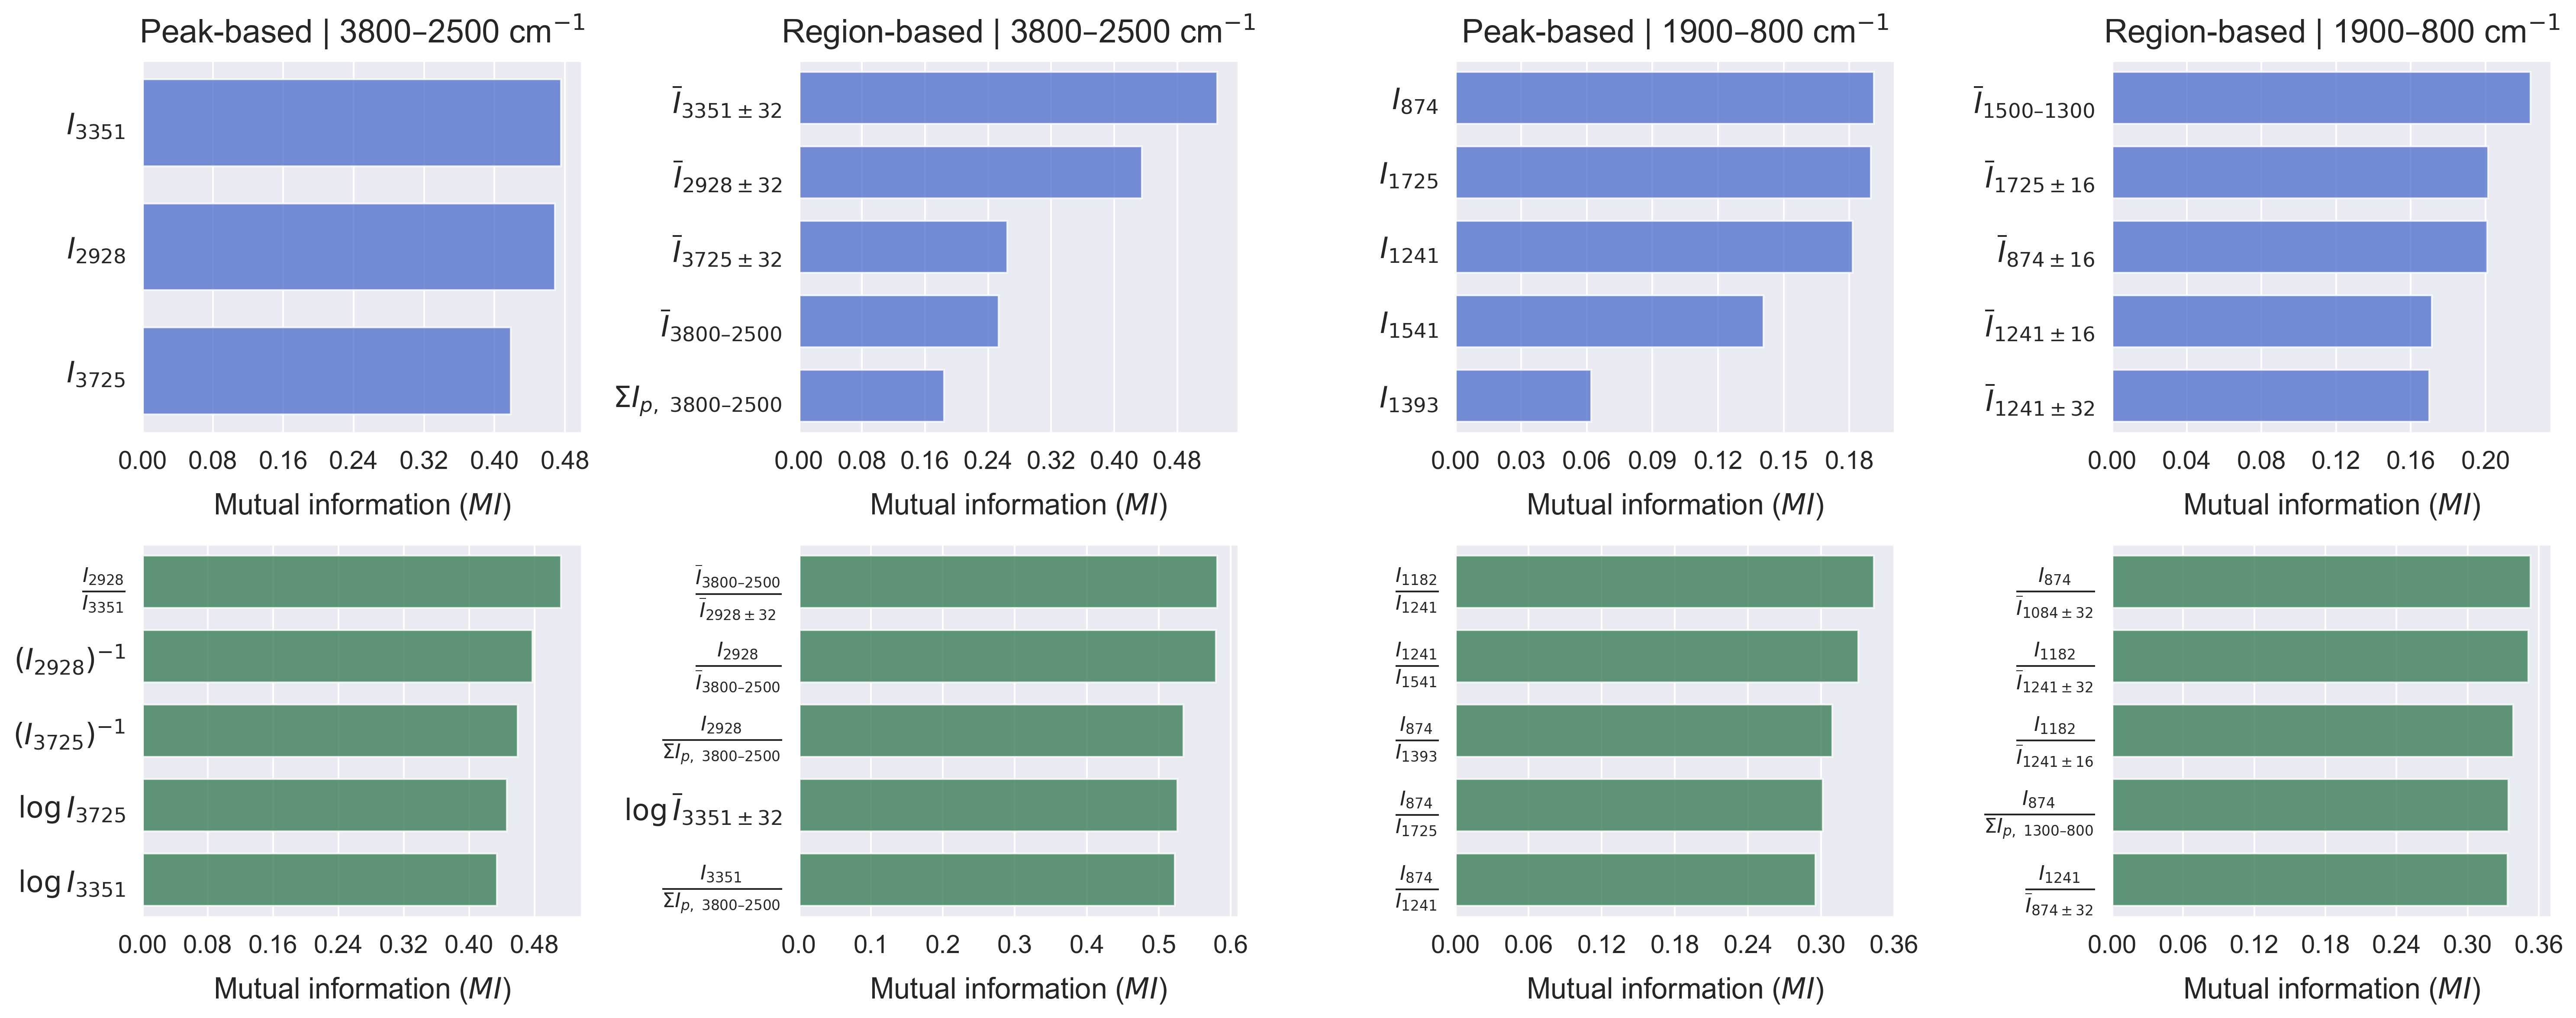

In [18]:
nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4), dpi=300)
axes = axes.flat

for i, feature_type in enumerate(feature_types):
    X_subset = features_df[features_description[feature_type]]
    y_subset = target

    mi = mutual_info_classif(X_subset, y_subset, discrete_features='auto', random_state=42)
    
    result_df = pd.DataFrame({
        'Feature': X_subset.columns,
        'Mutual_Info': mi
    })
    result_df = result_df.sort_values(by='Mutual_Info', ascending=False).head(5)

    ax = axes[i]
    
    kind = 'engineered' if 'engineered' in feature_type else 'base'
    plot_color = COLORS[kind]

    sns.barplot(
        data=result_df,
        x='Mutual_Info',
        y='Feature',
        ax=ax,
        color=plot_color,
        width=0.7,
        alpha=0.8
    )

    if i < 4:
        key = '_'.join(feature_type.split('_')[2:])
        ax.set_title(TITLE_MAP[key], fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=10)
        ax.set_xlabel('')
    
    ax.set_xlabel('Mutual information ($MI$)', fontsize=PLOT_STYLE['X_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['X_LABELPAD'])

    ax.set_ylabel('', fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])
    
    ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
    ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/mutual_info_barplots.svg')

plt.show()

## Visualization (BoxPlot & ViolinPlot)

In [19]:
base_feature_types = [
    'base_features_peaks_3800_2500',
    'base_features_intervals_3800_2500',
    'base_features_peaks_1900_800',
    'base_features_intervals_1900_800'
]

engineered_feature_types = [
    'engineered_features_peaks_3800_2500',
    'engineered_features_intervals_3800_2500',
    'engineered_features_peaks_1900_800',
    'engineered_features_intervals_1900_800'
]

### Function for sorting by *MS*

In [20]:
def get_ranked_features_by_mutual_info(features_df, target, features_description, feature_types):
    results_lst = []
    
    for feature_type in feature_types:
        X = features_df[features_description[feature_type]]
        mi = mutual_info_classif(X, target, discrete_features='auto', random_state=42)
        
        data = pd.DataFrame({
            'Feature': X.columns,
            'Mutual_Info': mi,
            'Feature_Type': feature_type
        })
        data = data.sort_values('Mutual_Info', ascending=False).reset_index(drop=True)
        
        results_lst.append(data)

    result_data = pd.concat(results_lst, ignore_index=True)
    return result_data

### *Base* features

#### Ranking features

In [21]:
ranked_data = get_ranked_features_by_mutual_info(
    features_df=features_df,
    target=target,
    features_description=features_description,
    feature_types=base_feature_types
)

print(ranked_data.shape)
ranked_data.head(3)

(40, 3)


Feature  Mutual_Info                   Feature_Type
0  $I_{3351}$     0.475365  base_features_peaks_3800_2500
1  $I_{2928}$     0.468834  base_features_peaks_3800_2500
2  $I_{3725}$     0.418758  base_features_peaks_3800_2500

In [22]:
top_n = 3

top_features_df = ranked_data.groupby('Feature_Type').head(top_n)

print(top_features_df.shape)
top_features_df.head(3)

(12, 3)


Feature  Mutual_Info                   Feature_Type
0  $I_{3351}$     0.475365  base_features_peaks_3800_2500
1  $I_{2928}$     0.468834  base_features_peaks_3800_2500
2  $I_{3725}$     0.418758  base_features_peaks_3800_2500

In [23]:
top_features = top_features_df['Feature']

#### Data preparation

In [24]:
df_vis = features_df[top_features].copy()

df_vis['target'] = target

desired_order = ['$d \\leq 2$', '$2 < d \\leq 5$', '$d > 5$']
df_vis['hue'] = hue
df_vis['hue'] = pd.Categorical(df_vis['hue'], categories=desired_order, ordered=True)

print(df_vis.shape)
df_vis.head(3)

(75, 14)


$I_{3351}$  $I_{2928}$  $I_{3725}$  \
division_1_size_bulk         1.0    0.491720    0.088957   
division_1_size_5            1.0    0.406937    0.028525   
division_1_size_3            1.0    0.618445    0.079233   

                      $\overline{I}_{3351 \pm 32}$  \
division_1_size_bulk                      0.992419   
division_1_size_5                         0.985416   
division_1_size_3                         0.989424   

                      $\overline{I}_{2928 \pm 32}$  \
division_1_size_bulk                      0.492079   
division_1_size_5                         0.401135   
division_1_size_3                         0.598930   

                      $\overline{I}_{3725 \pm 32}$  $I_{874}$  $I_{1725}$  \
division_1_size_bulk                      0.080474   0.048493    0.423273   
division_1_size_5                         0.029581   0.092297    0.384475   
division_1_size_3                         0.070730   0.112416    0.368753   

                      $I_{1241}$  $\overline{I}_{1500\text{–}1300}$  \
division_1_size_bulk    0.455066                           0.571735   
division_1_size_5       0.427988                           0.502368   
division_1_size_3       0.400950                           0.523513   

                      $\overline{I}_{1725 \pm 16}$  \
division_1_size_bulk                      0.419742   
division_1_size_5                         0.381089   
division_1_size_3                         0.367814   

                      $\overline{I}_{874 \pm 16}$  target             hue  
division_1_size_bulk                     0.047265       2         $d > 5$  
division_1_size_5                        0.092791       1  $2 < d \leq 5$  
division_1_size_3                        0.112733       1  $2 < d \leq 5$

In [25]:
feature_type_by_feature = dict(zip(ranked_data['Feature'], ranked_data['Feature_Type']))

grouped_features = defaultdict(list)

for feature in df_vis.columns:
    if feature in ['target', 'hue']:
        continue
    
    feature_type = feature_type_by_feature[feature]
    grouped_features[feature_type].append(feature)

#### Box plot

In [26]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'BOX_WIDTH': 0.6,
    'STRIP_ALPHA': 0.7,
    'STRIP_SIZE': 8,
    'STRIP_LINEWIDTH': 0.5,
    'STRIP_DODGE': True
}

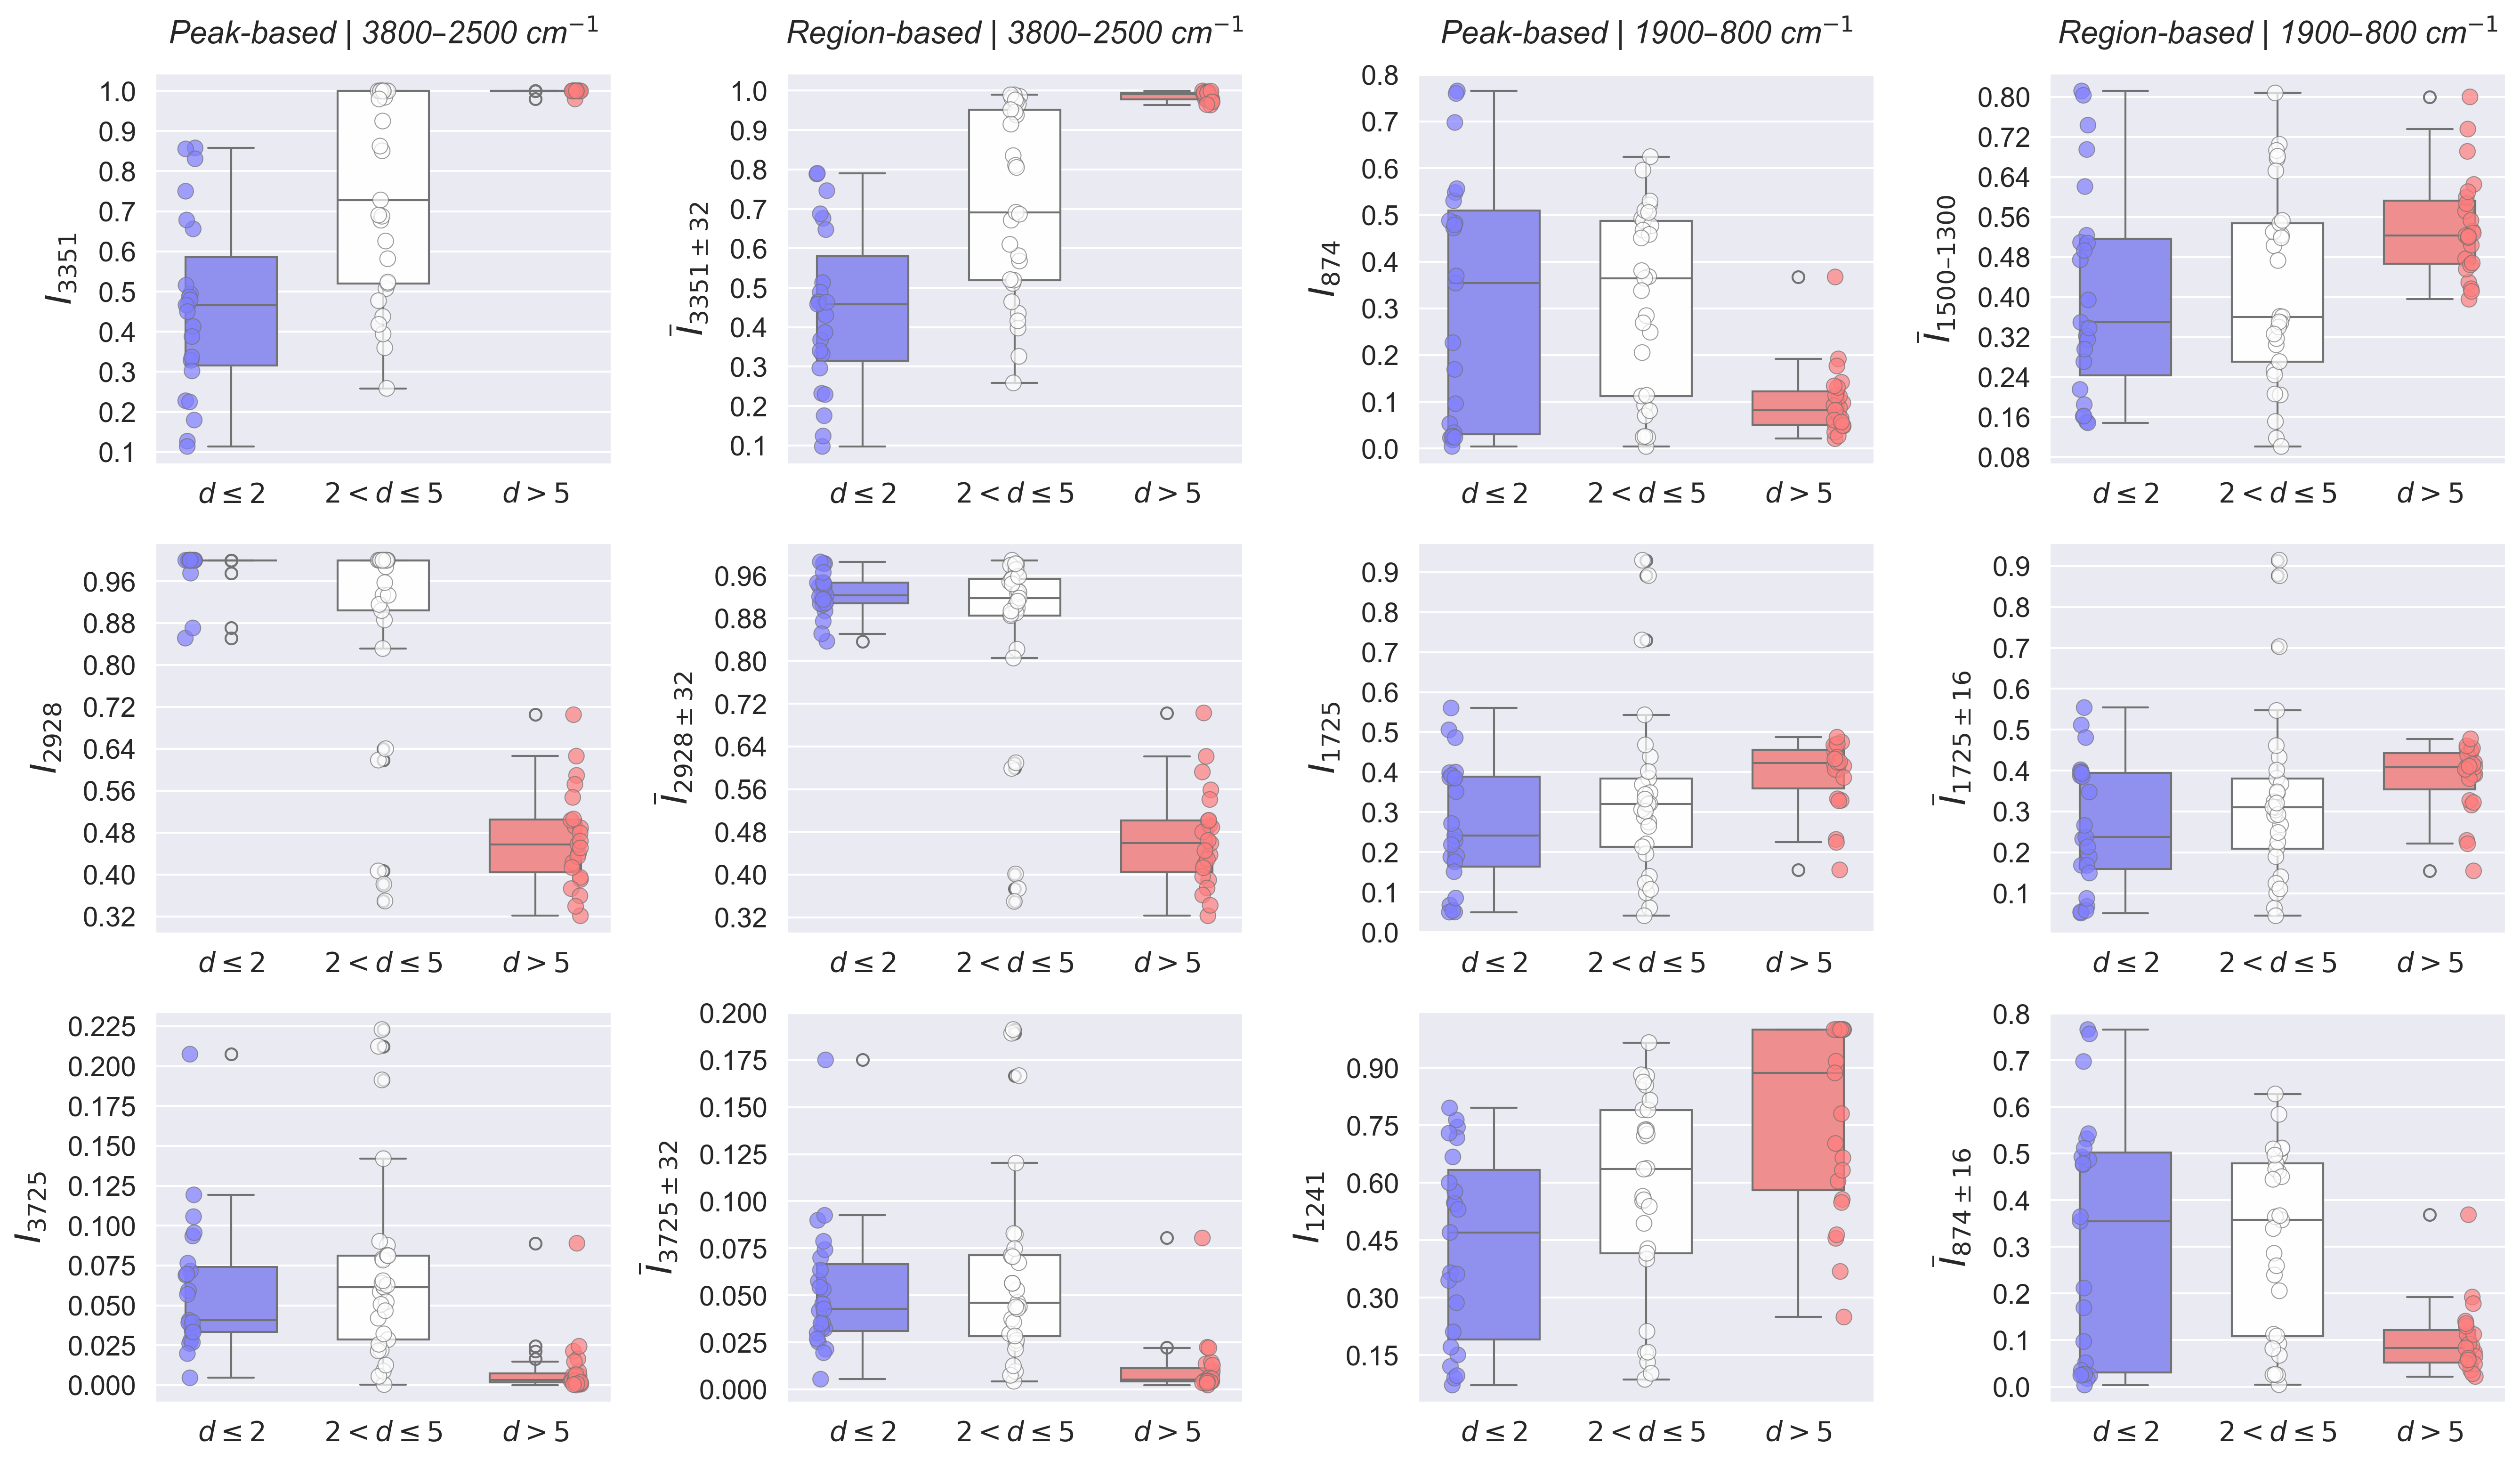

In [27]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.boxplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette='bwr',
            width=PLOT_STYLE['BOX_WIDTH'],
            order=desired_order,
            ax=ax
        )

        sns.stripplot(
            data=df_vis,
            x='hue',
            y=feature,
            order=desired_order,
            palette='bwr',
            dodge=PLOT_STYLE['STRIP_DODGE'],
            alpha=PLOT_STYLE['STRIP_ALPHA'],
            size=PLOT_STYLE['STRIP_SIZE'],
            linewidth=PLOT_STYLE['STRIP_LINEWIDTH'],
            ax=ax,
            legend=False
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title, fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(feature, fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])

        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

for col_idx, (_, features) in enumerate(grouped_features.items()):
    for r in range(len(features), 3):  # 3 = nrows
        axes[col_idx * 3 + r].axis("off")

plt.tight_layout()

plt.savefig(f'{path_to_save}/boxplot_base_features.svg')

plt.show()

#### Violin plot

In [28]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'VIOLIN_INNER': 'box',     # 'box', 'quartile', 'point', None
    'VIOLIN_CUT': 0,
    'VIOLIN_LINEWIDTH': 1,
    'PALETTE': 'bwr',
}


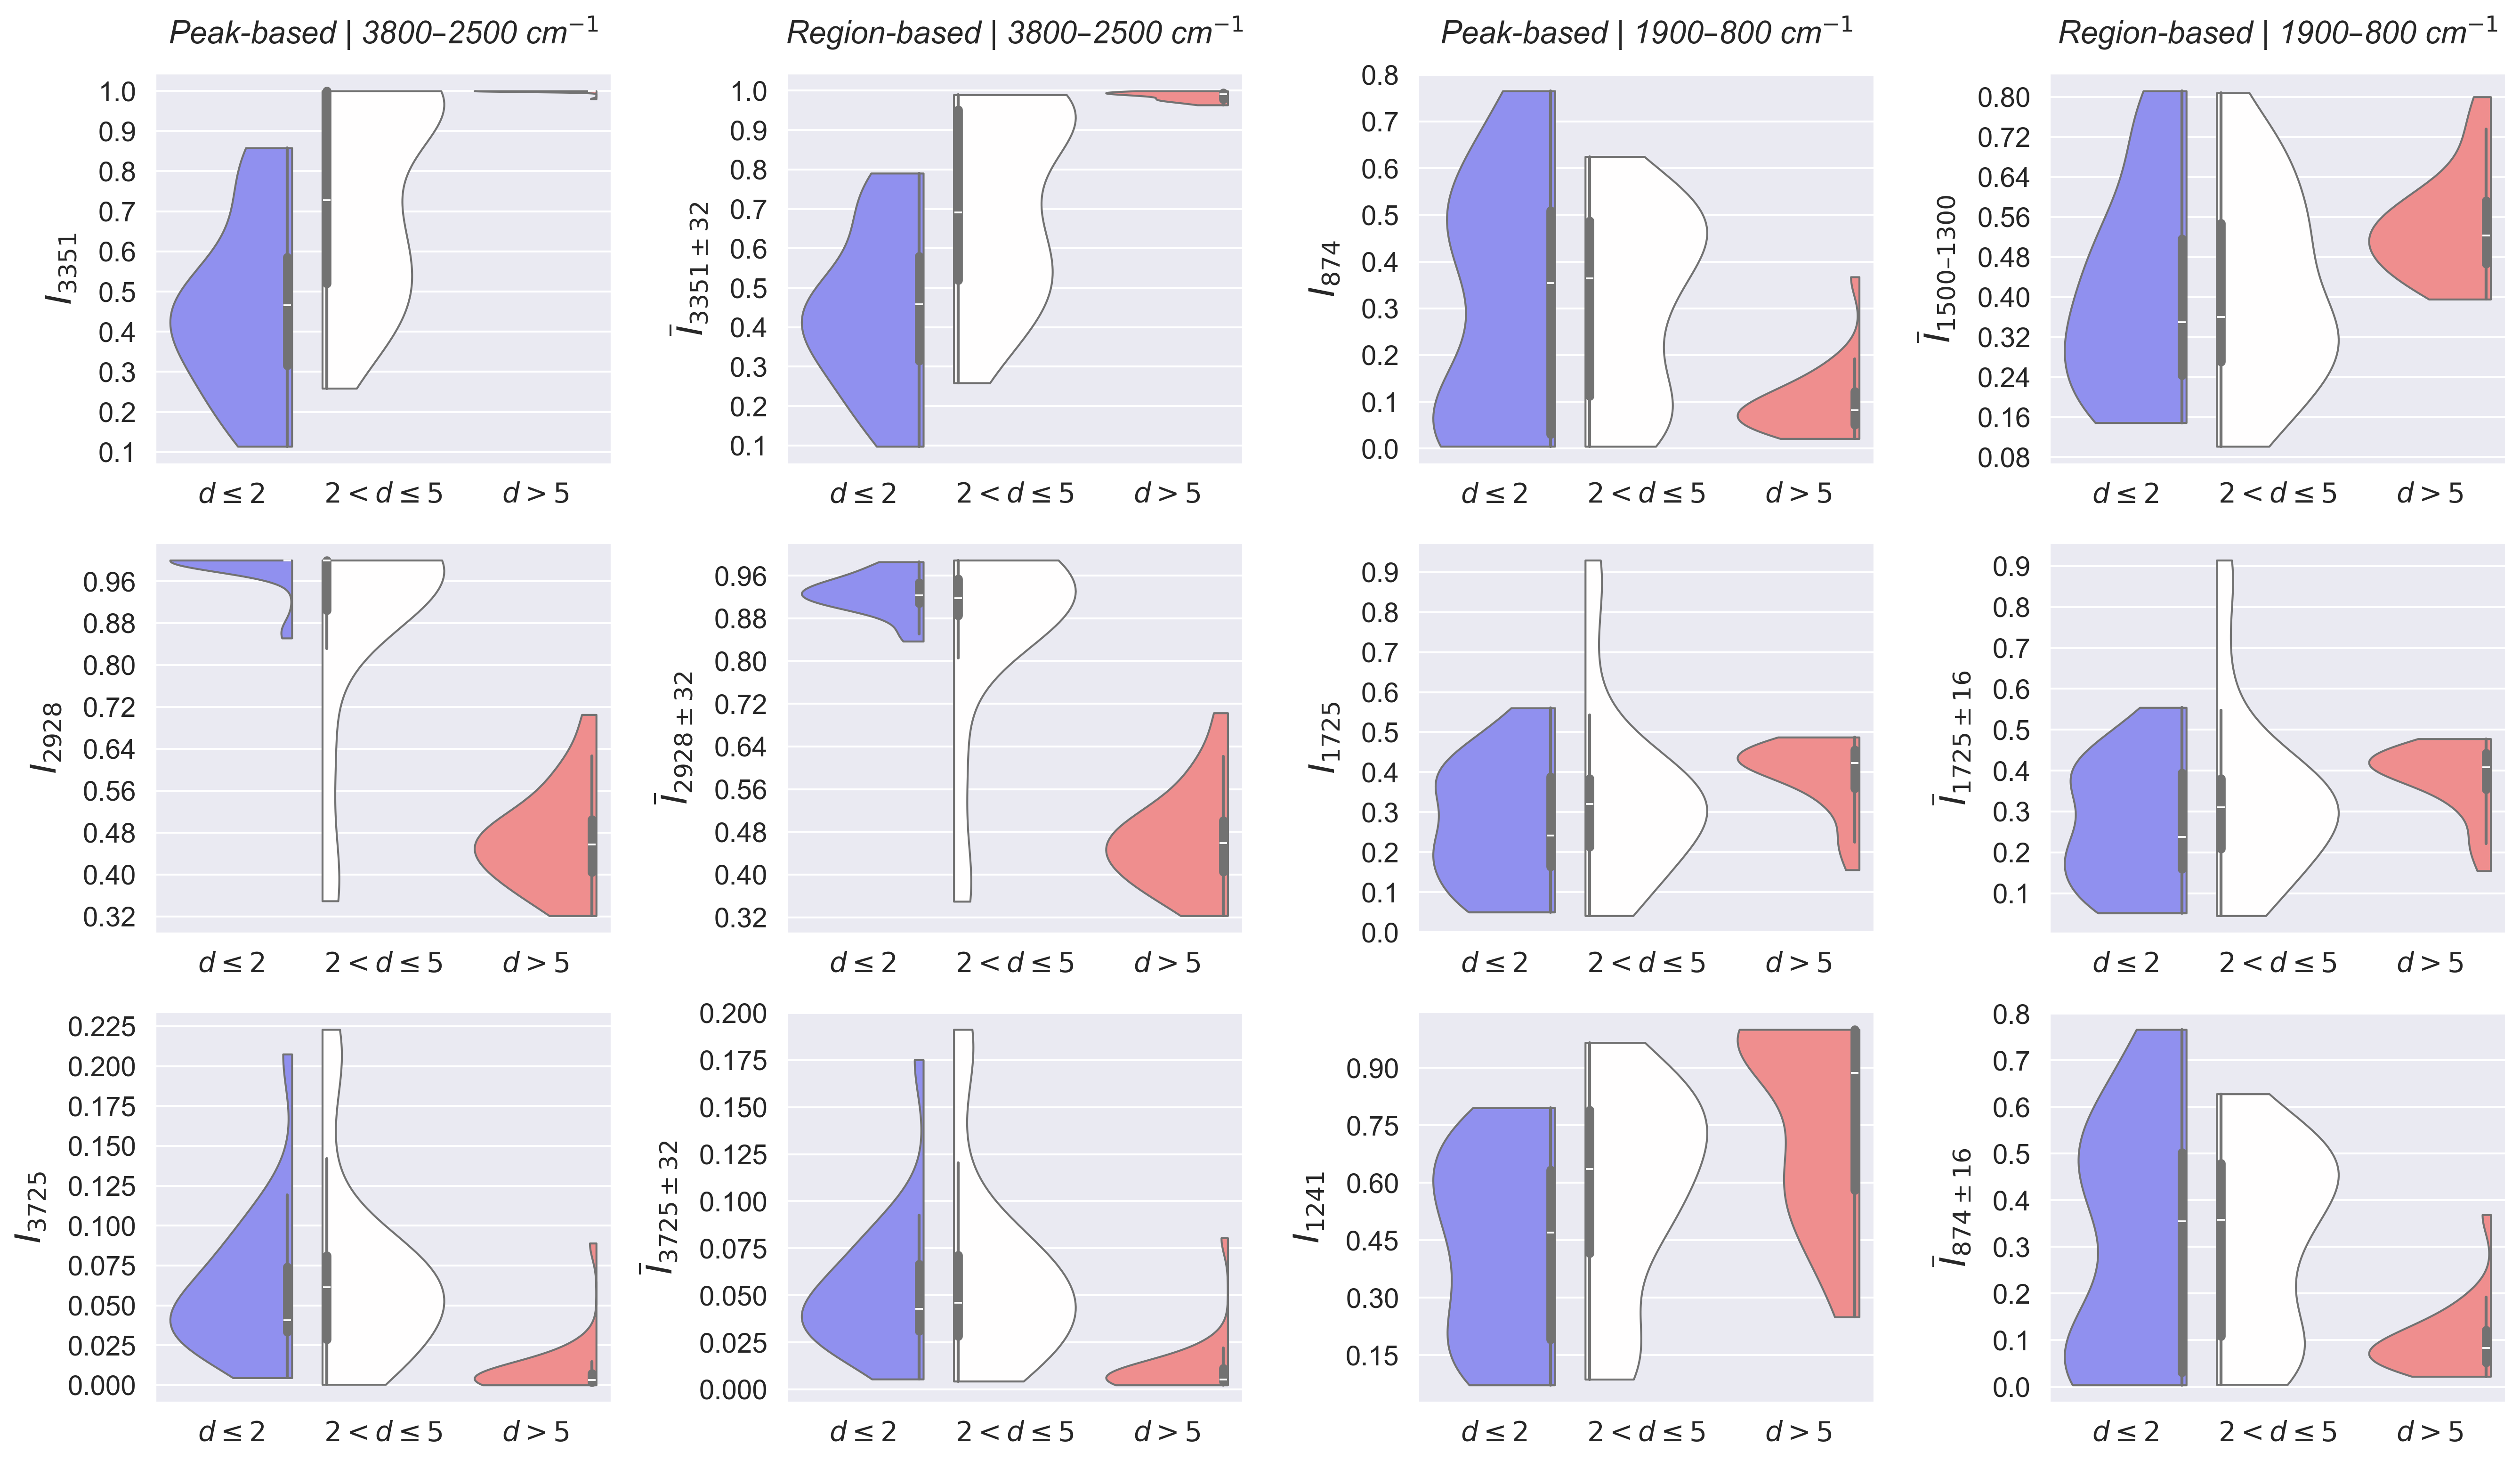

In [29]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.violinplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette=PLOT_STYLE['PALETTE'],
            cut=PLOT_STYLE['VIOLIN_CUT'],
            inner=PLOT_STYLE['VIOLIN_INNER'],
            linewidth=PLOT_STYLE['VIOLIN_LINEWIDTH'],
            split=True,
            order=desired_order,
            ax=ax
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title,
                         fontsize=PLOT_STYLE['TITLE_FONT_SIZE'],
                         fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'],
                         pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(
            feature,
            fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'],
            labelpad=PLOT_STYLE['Y_LABELPAD']
        )

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

for col_idx, (_, features) in enumerate(grouped_features.items()):
    for r in range(len(features), 3):  # 3 = nrows
        axes[col_idx * 3 + r].axis("off")

plt.tight_layout()

plt.savefig(f'{path_to_save}/violinplot_base_features.svg')

plt.show()

### *Engineered* features

#### Ranking features

In [30]:
ranked_data = get_ranked_features_by_mutual_info(
    features_df=features_df,
    target=target,
    features_description=features_description,
    feature_types=engineered_feature_types
)

print(ranked_data.shape)
ranked_data.head(3)

(492, 3)


Feature  Mutual_Info  \
0  $\frac{I_{2928}}{I_{3351}}$     0.512167   
1            $(I_{2928})^{-1}$     0.477382   
2            $(I_{3725})^{-1}$     0.459667   

                          Feature_Type  
0  engineered_features_peaks_3800_2500  
1  engineered_features_peaks_3800_2500  
2  engineered_features_peaks_3800_2500

In [31]:
top_n = 3

top_features_df = ranked_data.groupby('Feature_Type').head(top_n)

print(top_features_df.shape)
top_features_df.head(3)

(12, 3)


Feature  Mutual_Info  \
0  $\frac{I_{2928}}{I_{3351}}$     0.512167   
1            $(I_{2928})^{-1}$     0.477382   
2            $(I_{3725})^{-1}$     0.459667   

                          Feature_Type  
0  engineered_features_peaks_3800_2500  
1  engineered_features_peaks_3800_2500  
2  engineered_features_peaks_3800_2500

In [32]:
top_features = top_features_df['Feature']

#### Data preparation

In [33]:
df_vis = features_df[top_features].copy()
df_vis['target'] = target
df_vis['hue'] = hue

print(df_vis.shape)
df_vis.head(3)

(75, 14)


$\frac{I_{2928}}{I_{3351}}$  $(I_{2928})^{-1}$  \
division_1_size_bulk                     0.491720           2.033679   
division_1_size_5                        0.406937           2.457385   
division_1_size_3                        0.618445           1.616959   

                      $(I_{3725})^{-1}$  \
division_1_size_bulk          11.241429   
division_1_size_5             35.056730   
division_1_size_3             12.620970   

                      $\frac{\overline{I}_{3800\text{–}2500}}{\overline{I}_{2928 \pm 32}}$  \
division_1_size_bulk                                                              1.069344   
division_1_size_5                                                                 1.191391   
division_1_size_3                                                                 0.894577   

                      $\frac{I_{2928}}{\overline{I}_{3800\text{–}2500}}$  \
division_1_size_bulk                                            0.934471   
division_1_size_5                                               0.851494   
division_1_size_3                                               1.154270   

                      $\frac{I_{2928}}{\Sigma I_{p,\ 3800\text{–}2500}}$  \
division_1_size_bulk                                            0.311082   
division_1_size_5                                               0.283488   
division_1_size_3                                               0.364289   

                      $\frac{I_{1182}}{I_{1241}}$  \
division_1_size_bulk                     0.854650   
division_1_size_5                        0.973376   
division_1_size_3                        1.282869   

                      $\frac{I_{1241}}{I_{1541}}$  $\frac{I_{874}}{I_{1393}}$  \
division_1_size_bulk                     1.237696                    0.063758   
division_1_size_5                        1.438636                    0.134258   
division_1_size_3                        0.869446                    0.161389   

                      $\frac{I_{874}}{\overline{I}_{1084 \pm 32}}$  \
division_1_size_bulk                                      0.073801   
division_1_size_5                                         0.164244   
division_1_size_3                                         0.146761   

                      $\frac{I_{1182}}{\overline{I}_{1241 \pm 32}}$  \
division_1_size_bulk                                       0.871497   
division_1_size_5                                          0.982048   
division_1_size_3                                          1.277518   

                      $\frac{I_{1182}}{\overline{I}_{1241 \pm 16}}$  target  \
division_1_size_bulk                                       0.860165       2   
division_1_size_5                                          0.976248       1   
division_1_size_3                                          1.283196       1   

                                 hue  
division_1_size_bulk         $d > 5$  
division_1_size_5     $2 < d \leq 5$  
division_1_size_3     $2 < d \leq 5$

In [34]:
feature_type_by_feature = dict(zip(ranked_data['Feature'], ranked_data['Feature_Type']))

grouped_features = defaultdict(list)

for feature in df_vis.columns:
    if feature in ['target', 'hue']:
        continue
    
    feature_type = feature_type_by_feature[feature]
    grouped_features[feature_type].append(feature)

#### Box plot

In [35]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'BOX_WIDTH': 0.6,
    'STRIP_ALPHA': 0.7,
    'STRIP_SIZE': 8,
    'STRIP_LINEWIDTH': 0.5,
    'STRIP_DODGE': True
}

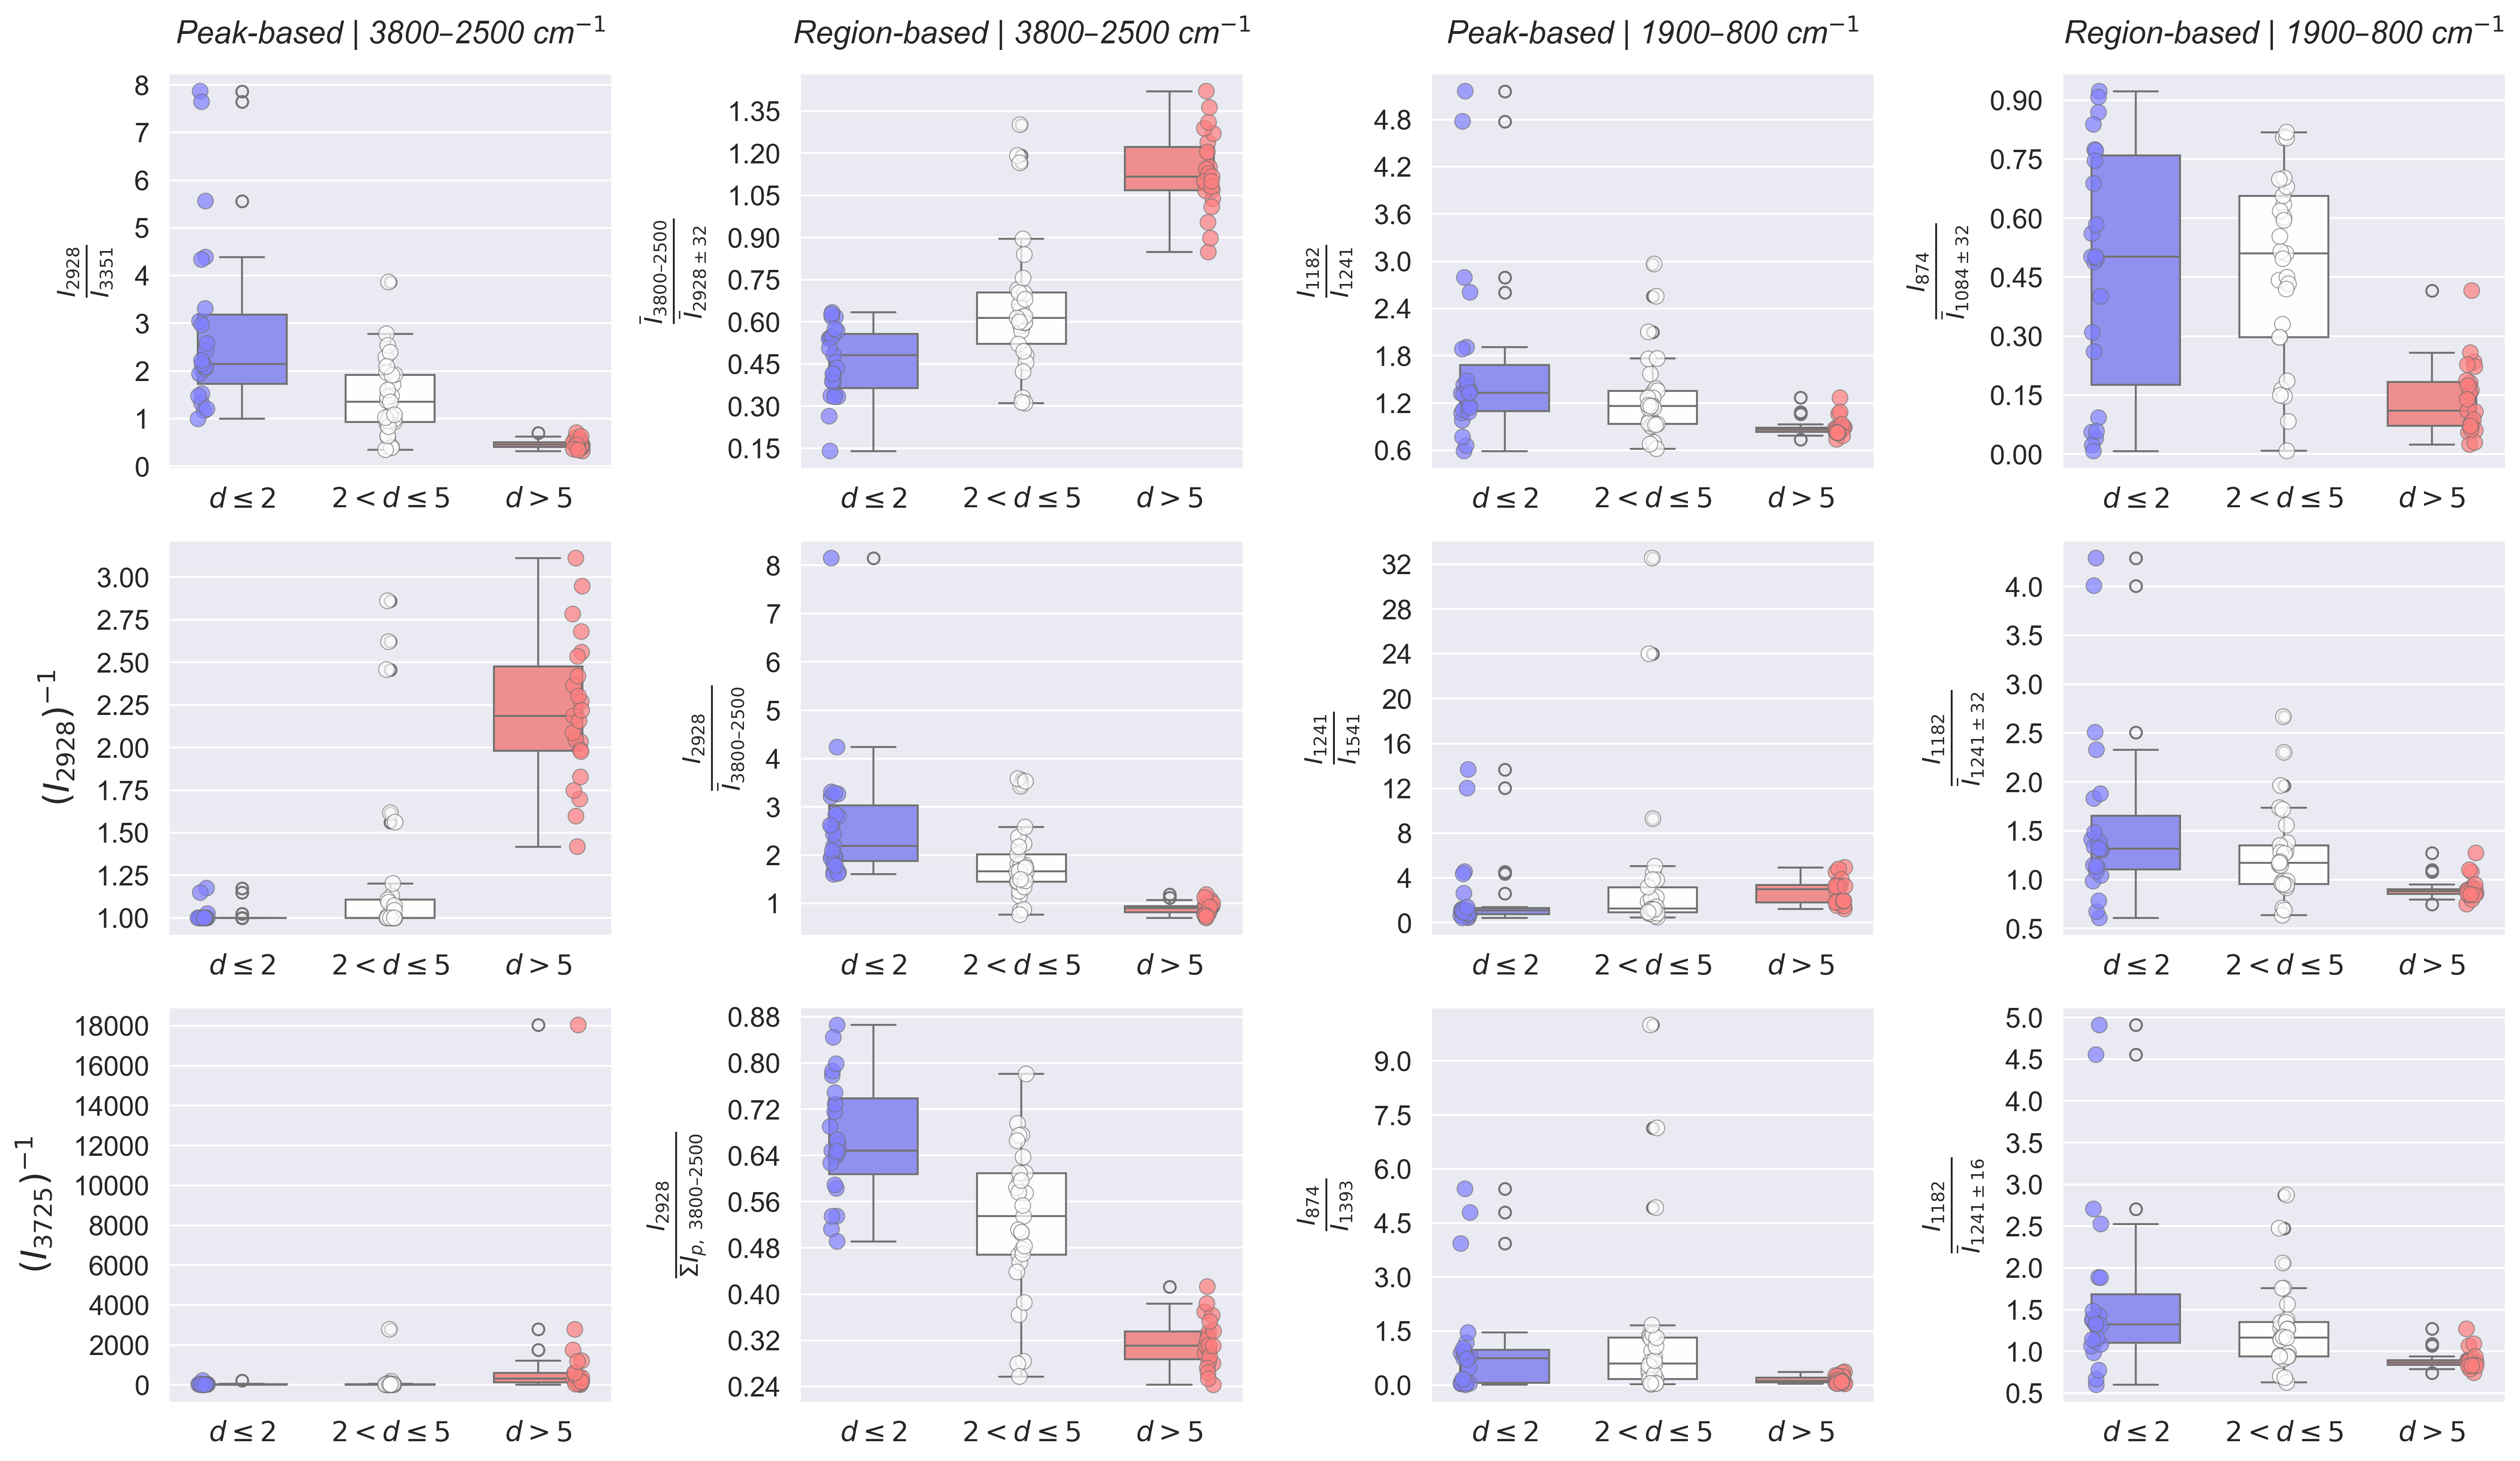

In [36]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.boxplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette='bwr',
            width=PLOT_STYLE['BOX_WIDTH'],
            order=desired_order,
            ax=ax
        )

        sns.stripplot(
            data=df_vis,
            x='hue',
            y=feature,
            order=desired_order,
            palette='bwr',
            dodge=PLOT_STYLE['STRIP_DODGE'],
            alpha=PLOT_STYLE['STRIP_ALPHA'],
            size=PLOT_STYLE['STRIP_SIZE'],
            linewidth=PLOT_STYLE['STRIP_LINEWIDTH'],
            ax=ax,
            legend=False
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title, fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(feature, fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])

        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/boxplot_engineered_features.svg')

plt.show()

#### Violin plot

In [37]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'VIOLIN_INNER': 'box',     # 'box', 'quartile', 'point', None
    'VIOLIN_CUT': 0,
    'VIOLIN_LINEWIDTH': 1,
    'PALETTE': 'bwr',
}

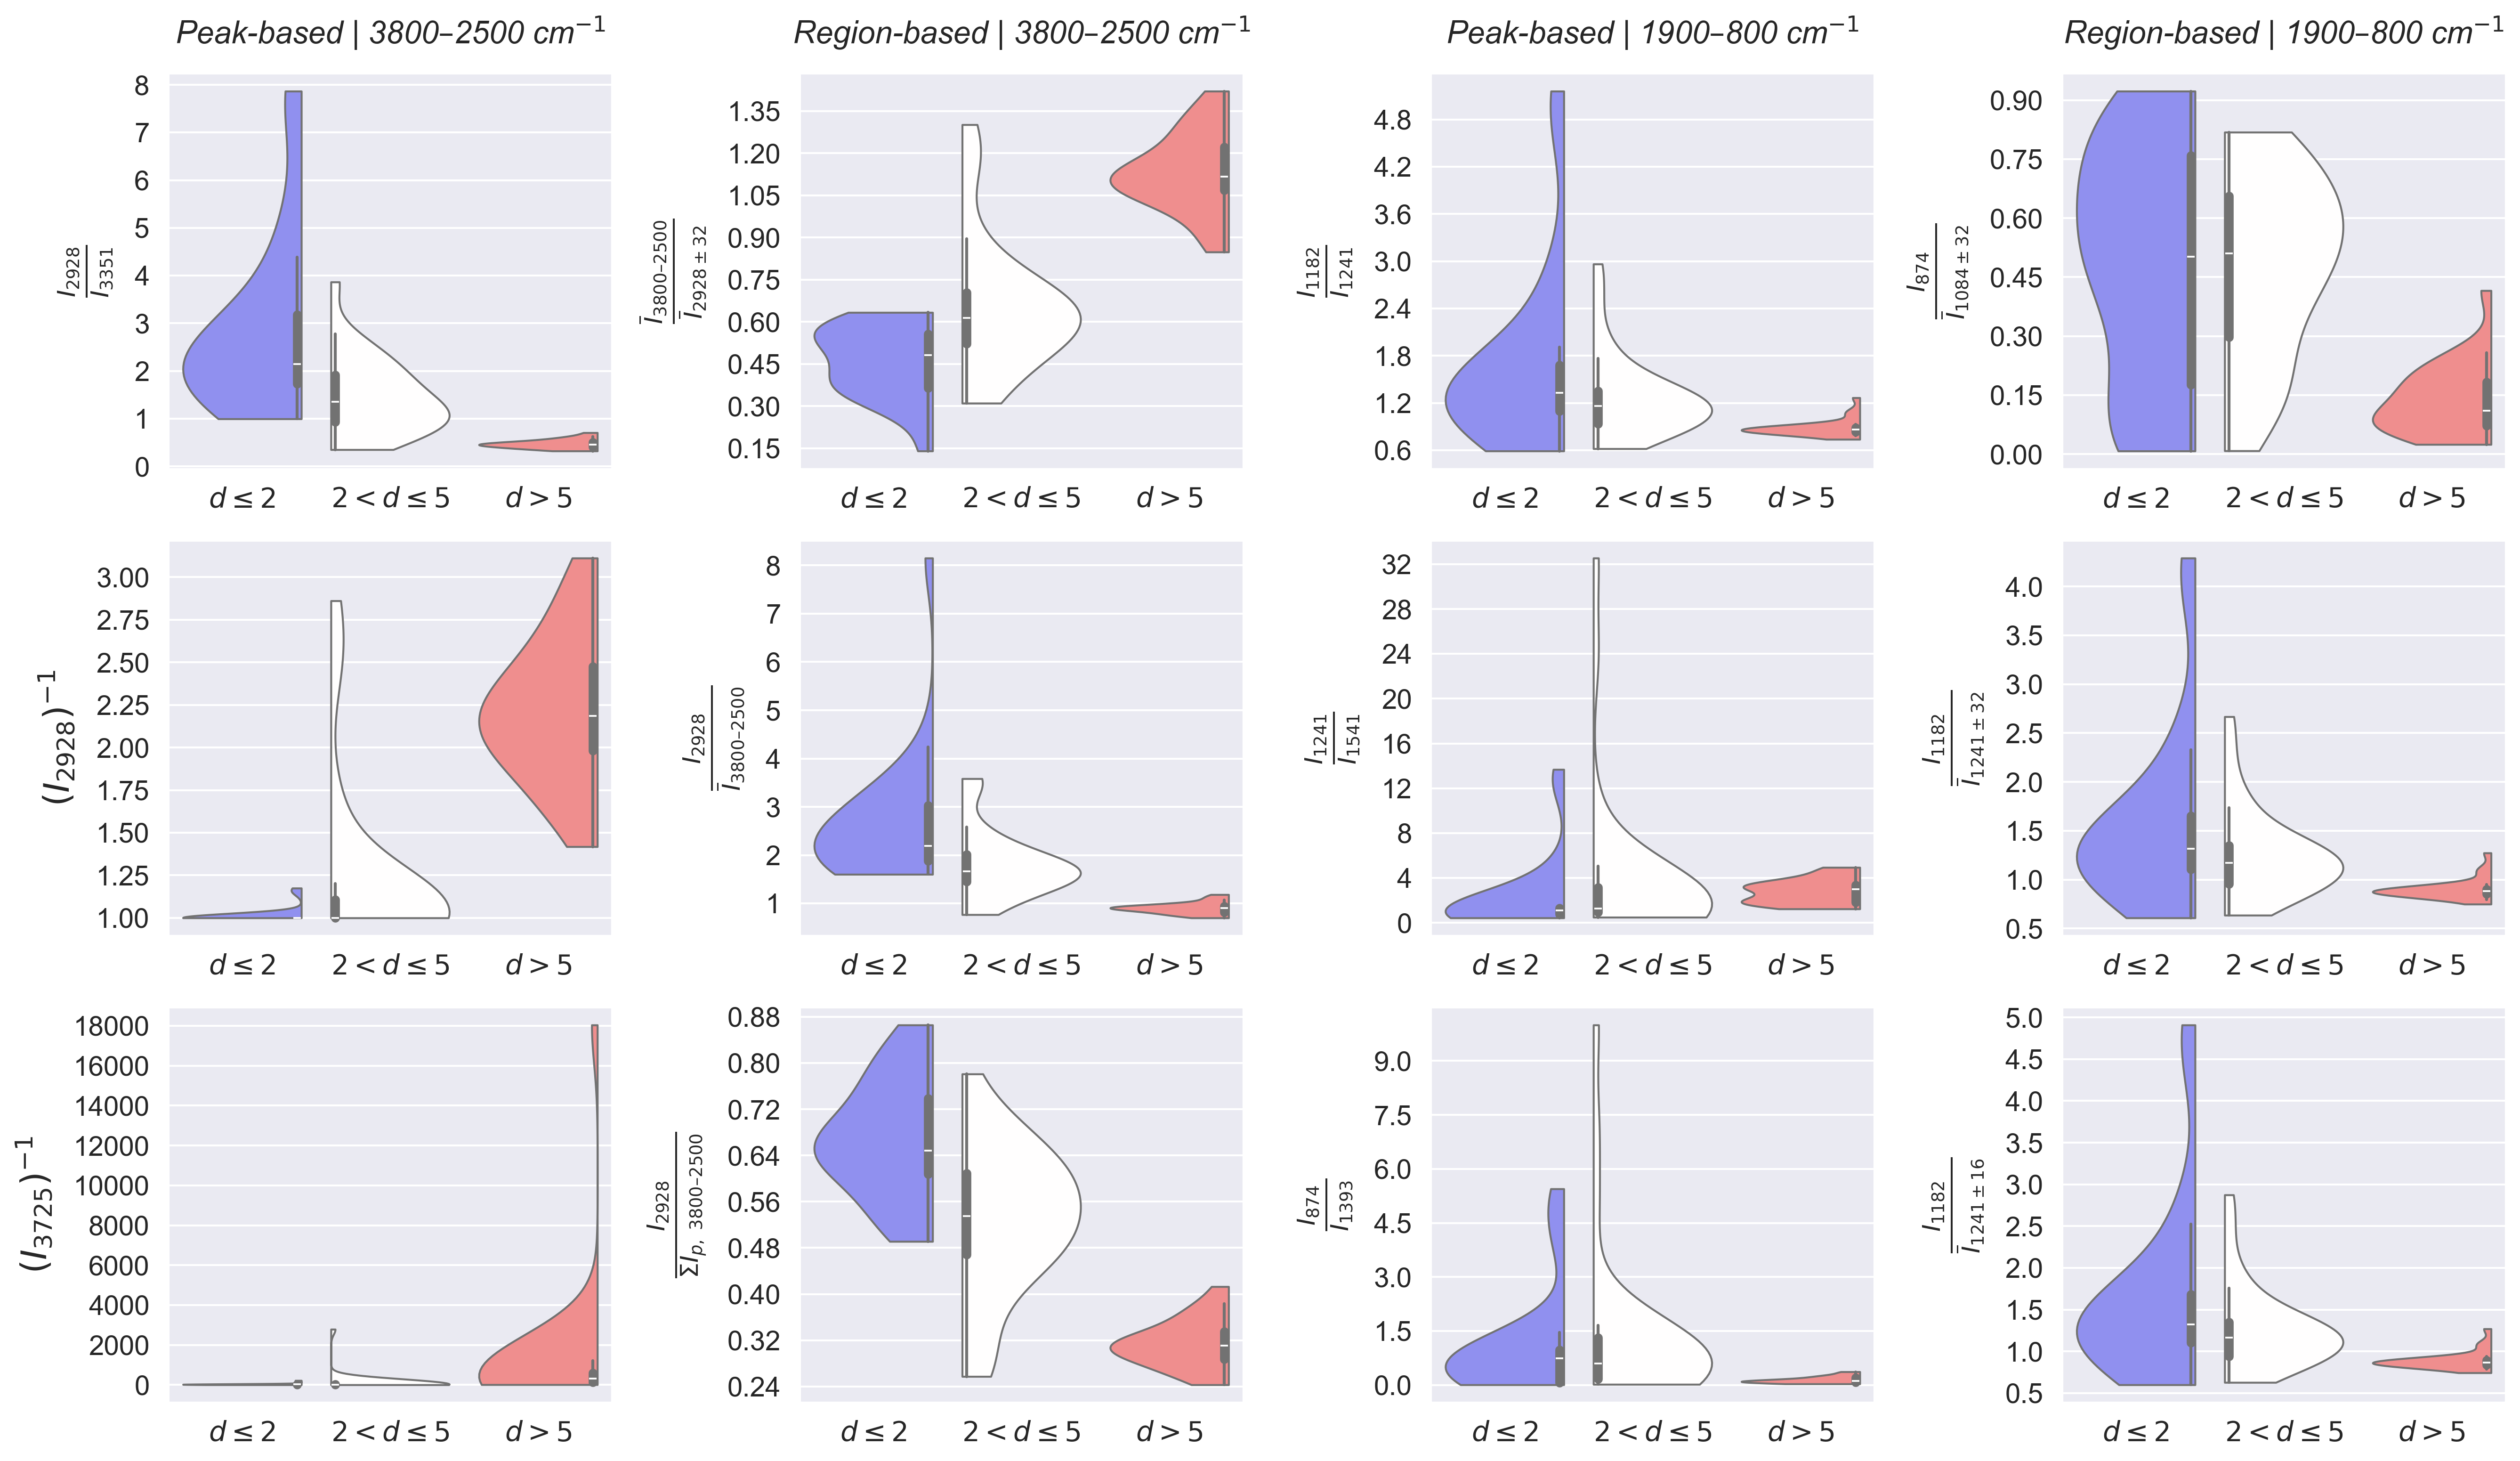

In [38]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.violinplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette=PLOT_STYLE['PALETTE'],
            cut=PLOT_STYLE['VIOLIN_CUT'],
            inner=PLOT_STYLE['VIOLIN_INNER'],
            linewidth=PLOT_STYLE['VIOLIN_LINEWIDTH'],
            split=True,
            order=desired_order,
            ax=ax
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title,
                         fontsize=PLOT_STYLE['TITLE_FONT_SIZE'],
                         fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'],
                         pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(
            feature,
            fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'],
            labelpad=PLOT_STYLE['Y_LABELPAD']
        )

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/violinplot_engineered_features.svg')

plt.show()